# 歩行ロボット

## 線形倒立振子
### 二次元
$
ma = mg\dfrac{x}{H} \\
\ddot{x} = \dfrac{g}{H}x
$

$x$ : 地面へ投影した時の重心の位置,$H$ : 重心の高さ

#### 2つの特殊解
$
x = \mathrm{e}^{\pm{\sqrt{\dfrac{g}{H}}t}}
$

#### 一般解(独立した特殊解の線形結合)
$
x = C_{1}\mathrm{e}^{+{\sqrt{\dfrac{g}{H}}t}} + C_{2}\mathrm{e}^{-{\sqrt{\dfrac{g}{H}}t}}
$

In [167]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

x1_init: [1.1427843122927064, 0.8572156877072936]
x2_init: [-0.43090200663339395, -9.569097993366606]


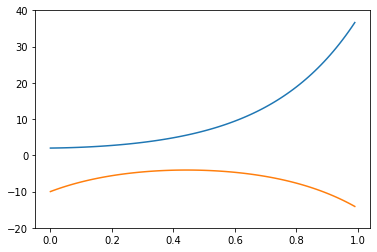

In [168]:
def calc_C1_C2(x0,v0,z):
    g = 9.81
    c1 = (x0+math.sqrt(z/g)*v0)/2
    c2 = (x0-math.sqrt(z/g)*v0)/2
    return [c1,c2]

G = 9.81
H = 0.8
x1_list = []
x2_list = []
x_init = [2,-10]
v_init = [1,32]

time_map = np.arange(0,1,0.01)
x1_init = calc_C1_C2(x_init[0],v_init[0],H)
x2_init = calc_C1_C2(x_init[1], v_init[1],H)

print("x1_init:",x1_init)
print("x2_init:",x2_init)

for t in time_map:
    x1 = (x1_init[0] * math.e**(math.sqrt(G/H)*t)) + (x1_init[1] * math.e**(-1*math.sqrt(G/H)*t))
    x2 = (x2_init[0] * math.e**(math.sqrt(G/H)*t)) + (x2_init[1] * math.e**(-1*math.sqrt(G/H)*t))
    x1_list.append(x1)
    x2_list.append(x2)

plt.ylim((-20,40))
plt.plot(time_map,x1_list)
plt.plot(time_map,x2_list)
plt.show()




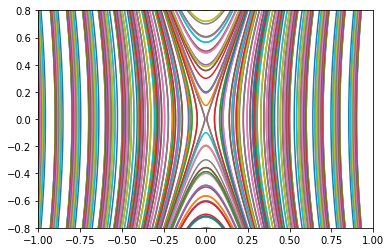

In [187]:
#位相図
def calc_C1_C2(x0,v0,z):
    g = 9.81
    c1 = (x0+math.sqrt(z/g)*v0)/2
    c2 = (x0-math.sqrt(z/g)*v0)/2
    return [c1,c2]

G = 9.81
H = 0.8

for xi in np.arange(-1,1,0.1):
    for dxi in np.arange(-1,1,0.1):
        _init = calc_C1_C2(xi,dxi,H)
        c1 = _init[0]
        c2 = _init[1]
        x_list = []
        dx_list = []
        for t in np.arange(-5,5,0.01):
            x = (c1 * math.e**(math.sqrt(G/H)*t)) + (c2 * math.e**(-1*math.sqrt(G/H)*t))
            dx = (c1 * math.sqrt(G/H) * math.e**(math.sqrt(G/H)*t)) - (c2 * math.sqrt(G/H) * math.e**(-1*math.sqrt(G/H)*t))
            x_list.append(x)
            dx_list.append(dx)
        plt.plot(x_list,dx_list)
plt.xlim((-1,1))
plt.ylim((-0.8,0.8))
plt.show()